In [1]:
import cv2
import numpy as np
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

app = FaceAnalysis(name="buffalo_s",providers=['CUDAExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))
#img = ins_get_image("t1")
img = cv2.imread("./Giron.jpg")
faces = app.get(img)
rimg = app.draw_on(img, faces)
cv2.imwrite("./t1_output.jpg", rimg)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\w600k_mbf.onnx recognition ['None', 3, 112, 112] 127

c:\Users\GlobE\OneDrive\Escritorio\IA Pruebas\InsightFace\entorno\Lib\site-packages\insightface\model_zoo\retinaface.py:285: RuntimeWarning: invalid value encountered in divide
  ovr = inter / (areas[i] + areas[order[1:]] - inter)
c:\Users\GlobE\OneDrive\Escritorio\IA Pruebas\InsightFace\entorno\Lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


True

In [2]:
print(faces)
print(faces[0].keys())
print(faces[0]['det_score'])

[{'bbox': array([313.40253, 267.30438, 545.1706 , 569.27057], dtype=float32), 'kps': array([[389.88876, 384.71194],
       [496.97476, 391.2876 ],
       [448.13086, 459.18396],
       [393.29532, 496.97653],
       [478.23407, 502.2862 ]], dtype=float32), 'det_score': 0.78039527, 'landmark_3d_68': array([[ 3.09263367e+02,  3.65334961e+02,  1.40755264e+02],
       [ 3.10192261e+02,  3.98831696e+02,  1.40806244e+02],
       [ 3.11436249e+02,  4.33318573e+02,  1.38207458e+02],
       [ 3.14301392e+02,  4.66794952e+02,  1.29900055e+02],
       [ 3.23274475e+02,  4.98561737e+02,  1.07989021e+02],
       [ 3.40310913e+02,  5.22823364e+02,  8.85868607e+01],
       [ 3.61882233e+02,  5.40866821e+02,  7.13467407e+01],
       [ 3.88859192e+02,  5.55130920e+02,  4.77637100e+01],
       [ 4.28835388e+02,  5.66635559e+02,  4.42338371e+01],
       [ 4.64366028e+02,  5.60172363e+02,  6.40604401e+01],
       [ 4.87835236e+02,  5.47508545e+02,  9.53178329e+01],
       [ 5.07934082e+02,  5.28889282e+02

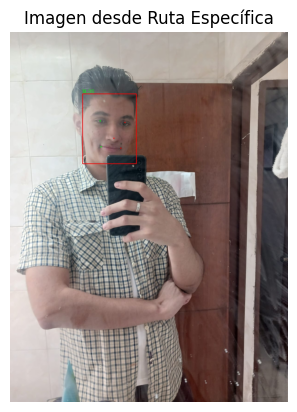

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imagen = mpimg.imread("./t1_output.jpg")

# Muestra la imagen utilizando Matplotlib
plt.imshow(imagen)
plt.title('Imagen desde Ruta Específica')
plt.axis('off')  # Opcional: desactiva los ejes
plt.show()

In [4]:
import cv2

# Abre la cámara
cap = cv2.VideoCapture(0)  # 0 para la cámara predeterminada, puedes cambiarlo si tienes múltiples cámaras
if not cap.isOpened():
    print("Error al abrir la cámara.")
    exit()
frame_numero = 0

while True:
    # Lee un frame de la cámara
    ret, frame = cap.read()
    
    if not ret:
        print("Error al capturar el frame.")
        break
    
    frame_numero += 1

    if (frame_numero % 1) == 0:
        faces = app.get(frame)
        frame = app.draw_on(frame, faces)
    #cv2.imwrite(f"./{frame_numero}_output.jpg"  , rimg)

    # Muestra el número del frame en la esquina superior izquierda
    cv2.putText(frame, f'Frame: {frame_numero}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    # Muestra el frame en una ventana
    cv2.imshow('Frame de la Cámara', frame)
    # Sale del bucle si se presiona la tecla 'q'
    if cv2.waitKey(1) & 0xFF == ord('q') or frame_numero == 10000:
        break

# Libera la cámara y cierra todas las ventanas
cap.release()
cv2.destroyAllWindows()

## Swapper Model

In [4]:
swapper = insightface.model_zoo.get_model("inswapper_128.onnx", download=False, download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [6]:
img_face_swap = cv2.imread("./Kevin.jpg")
face_swap = app.get(img_face_swap)

c:\Users\GlobE\OneDrive\Escritorio\IA Pruebas\InsightFace\entorno\Lib\site-packages\insightface\model_zoo\retinaface.py:285: RuntimeWarning: invalid value encountered in divide
  ovr = inter / (areas[i] + areas[order[1:]] - inter)
c:\Users\GlobE\OneDrive\Escritorio\IA Pruebas\InsightFace\entorno\Lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


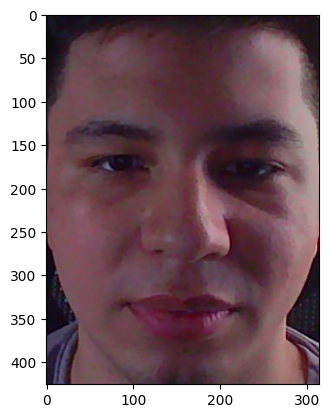

In [9]:
source_face = face_swap[0]
bbox = source_face["bbox"]
bbox = [int(b) for b in bbox]

plt.imshow(img_face_swap[bbox[1]:bbox[3], bbox[0]:bbox[2],::-1])
plt.show()

In [10]:
res = img.copy()

for face in faces:
    res = swapper.get(res, face, source_face, paste_back=True)

## Plot the Swapped Faces

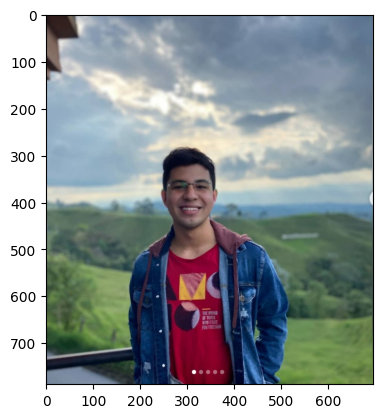

In [11]:
plt.imshow(res[:,:,::-1])
plt.show()

## Final Script

In [5]:
def Swapping(url_img, url_source_face):
    img = cv2.imread(url_img)
    swapper = insightface.model_zoo.get_model("inswapper_128.onnx", download=False, download_zip=False)
    source_face_img = cv2.imread(url_source_face)
    source_face = app.get(source_face_img)
    print(len(source_face))
    source_face = source_face[0]
    res = img.copy()

    faces = app.get(res)

    for face in faces:
        res = swapper.get(res, face, source_face, paste_back=True)
    plt.imshow(res[:,:,::-1])
    plt.show()

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]
1


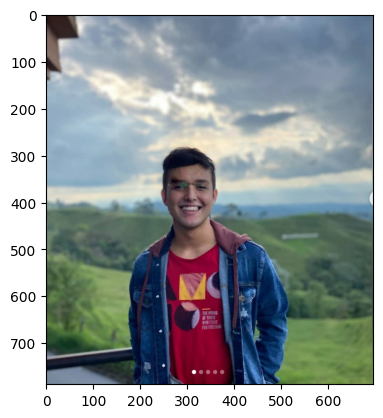

In [7]:
Swapping("./Julian.jpg","./Giron.jpg")

## Emotion ONNX model

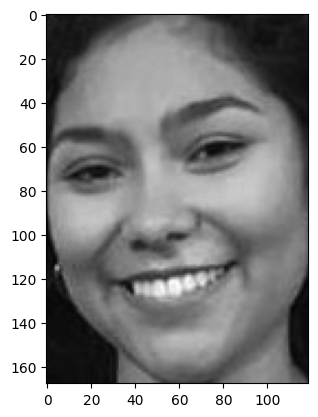

True

In [3]:
img = cv2.imread("./Majo.jpg")
face_subject= app.get(img)
source_face = face_subject[0]
bbox = source_face["bbox"]
bbox = [int(b) for b in bbox]

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2]], cmap='gray')
plt.show()

cv2.imwrite("./64b64Subject.jpg", img[bbox[1]:bbox[3], bbox[0]:bbox[2]])

In [4]:
import PIL

def preprocess(image_path):
    input_shape = (1, 1, 64, 64)
    img = PIL.Image.open(image_path)
    img = img.resize((64, 64), PIL.Image.LANCZOS)
    img_data = np.array(img)
    img_data = np.resize(img_data, input_shape)
    return img_data

img_data = preprocess("./64b64Subject.jpg")

In [5]:
import onnxruntime

img_data = img_data.astype(np.float32)
sesion = onnxruntime.InferenceSession("./emotion-ferplus-12-int8.onnx", providers=["CUDAExecutionProvider"])
input_name = sesion.get_inputs()[0].name
print(input_name)
results = sesion.run(None, {input_name: img_data})
#emotion_table = {'neutral':0, 'happiness':1, 'surprise':2, 'sadness':3, 'anger':4, 'disgust':5, 'fear':6, 'contempt':7}
print(results)

Input3
[array([[ 1.6876101, 13.530261 ,  0.553103 , -1.2636557, -1.9586735,
        -4.198307 , -4.3077517, -1.8217279]], dtype=float32)]


In [6]:
def Emotion(results):
    emotion = ["Neutral", "Happiness", "Surprise", "Sadness", "Anger", "Disgust", "Fear", "Contempt"]
    results = results[0][0]
    max_value = max(results)
    max_index = np.where(results == max_value)
    return emotion[max_index[0][0]]

Emotion(results)

'Happiness'

In [7]:
import cv2

# Abre la cámara
cap = cv2.VideoCapture(0)  # 0 para la cámara predeterminada, puedes cambiarlo si tienes múltiples cámaras
if not cap.isOpened():
    print("Error al abrir la cámara.")
    exit()
frame_numero = 0

while True:
    # Lee un frame de la cámara
    ret, frame = cap.read()
    
    if not ret:
        print("Error al capturar el frame.")
        break
    
    frame_numero += 1

    emotion = 'None'
    if (frame_numero % 1) == 0:
        face_subject = app.get(frame)
        if (len(face_subject) > 0):
            source_face = face_subject[0]
            bbox = source_face["bbox"]
            bbox = [int(b) for b in bbox]
            img = frame[bbox[1]:bbox[3], bbox[0]:bbox[2]]
            img = PIL.Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
            input_shape = (1, 1, 64, 64)
            img = img.resize((64, 64), PIL.Image.LANCZOS)
            img_data = np.array(img)
            img_data = np.resize(img_data, input_shape)
            img_data = img_data.astype(np.float32)
            results = sesion.run(None, {"Input3": img_data})
            emotion = Emotion(results)
    #cv2.imwrite(f"./{frame_numero}_output.jpg"  , rimg)
    # Muestra el número del frame en la esquina superior izquierda
    cv2.putText(frame, f'{emotion}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    # Muestra el frame en una ventana
    cv2.imshow('Frame de la Cámara', frame)
    # Sale del bucle si se presiona la tecla 'q'
    if cv2.waitKey(1) & 0xFF == ord('q') or frame_numero == 10000:
        break

# Libera la cámara y cierra todas las ventanas
cap.release()
cv2.destroyAllWindows()